In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [54]:
# feed input data to test and train
train_dir = '/Users/miteshwandhare/Downloads/Covid19-dataset/train'
test_dir = '/Users/miteshwandhare/Downloads/Covid19-dataset/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')



Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [55]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)



Epoch 1/20
7/7 [==============================] - 12s 2s/step - loss: 1.1208 - accuracy: 0.4292 - val_loss: 1.0836 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 1.0595 - accuracy: 0.4795 - val_loss: 0.9784 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 0.8826 - accuracy: 0.6210 - val_loss: 0.4636 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.5838 - accuracy: 0.7443 - val_loss: 0.4662 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.5205 - accuracy: 0.7900 - val_loss: 0.4651 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.4893 - accuracy: 0.8082 - val_loss: 0.4558 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.4500 - accuracy: 0.8265 - val_loss: 0.3769 - val_accuracy: 0.7969
Epoch 8/20
7/7 [==================

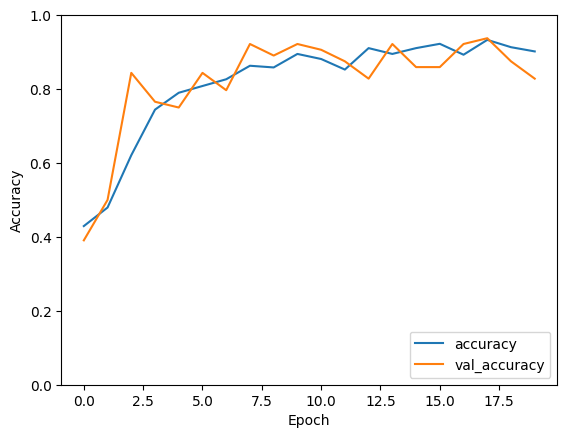

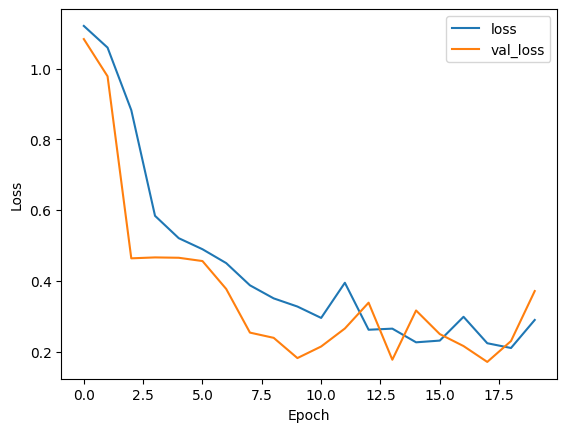

3/3 - 1s - loss: 0.3679 - accuracy: 0.8333 - 1s/epoch - 465ms/step

Test accuracy: 0.8333333134651184
3/3 [==============================] - 1s 294ms/step


In [56]:
# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)

# Generate predictions
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)



1/1 [==============================] - 0s 60ms/step


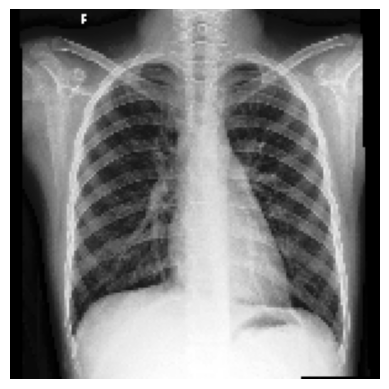

Predicted Label: Normal


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to predict and display the label of an uploaded image
def predict_and_display_label(model, class_names, img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict the class of the image
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = list(class_names)[predicted_class_index]
    
    # Display the uploaded image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Display the predicted label
    print("Predicted Label:", predicted_class)

# Example usage:
img_path = '/Users/miteshwandhare/Downloads/Covid19-dataset/test/Normal/0102.jpeg'  # Example image path
predict_and_display_label(model, train_generator.class_indices.keys(), img_path)
